In [17]:
path1 = "/content/cat.jpg"
path2 = "/content/long hair uncle.jpg"
path3 = "/content/tree.webp"
path4 = "/content/underwater.png"
path5 = "/content/waves.webp"
path6 = "/content/cameraman.png"
path7 = "/content/colorfulcat.png"
path8 = "/content/flower.png"

In [18]:
paths = [path1, path2, path3, path4, path5, path6, path7, path8]

# High Boost Filter

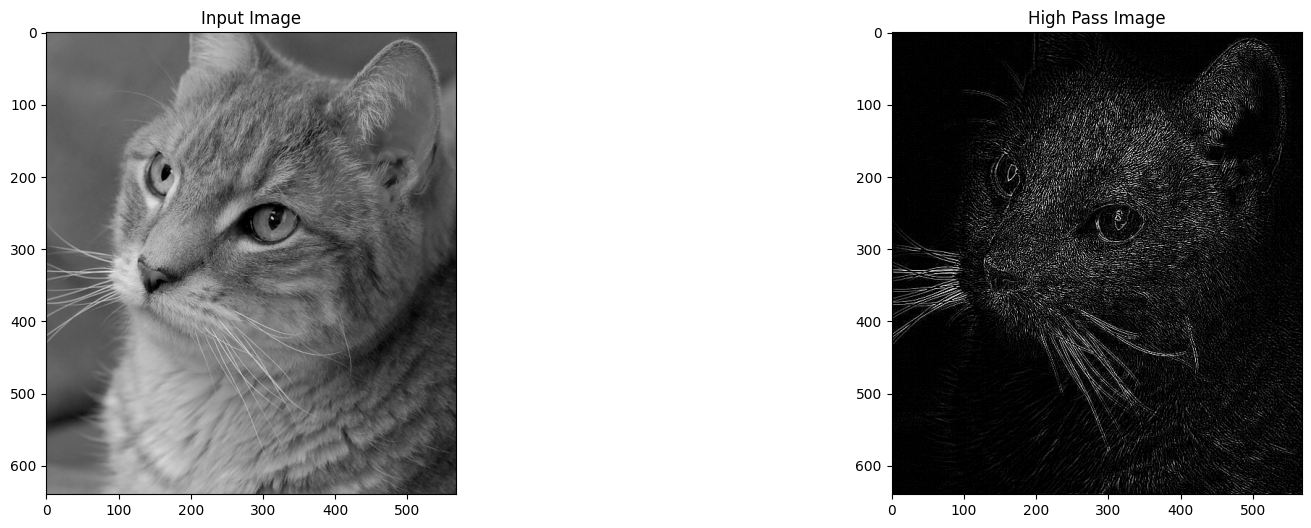

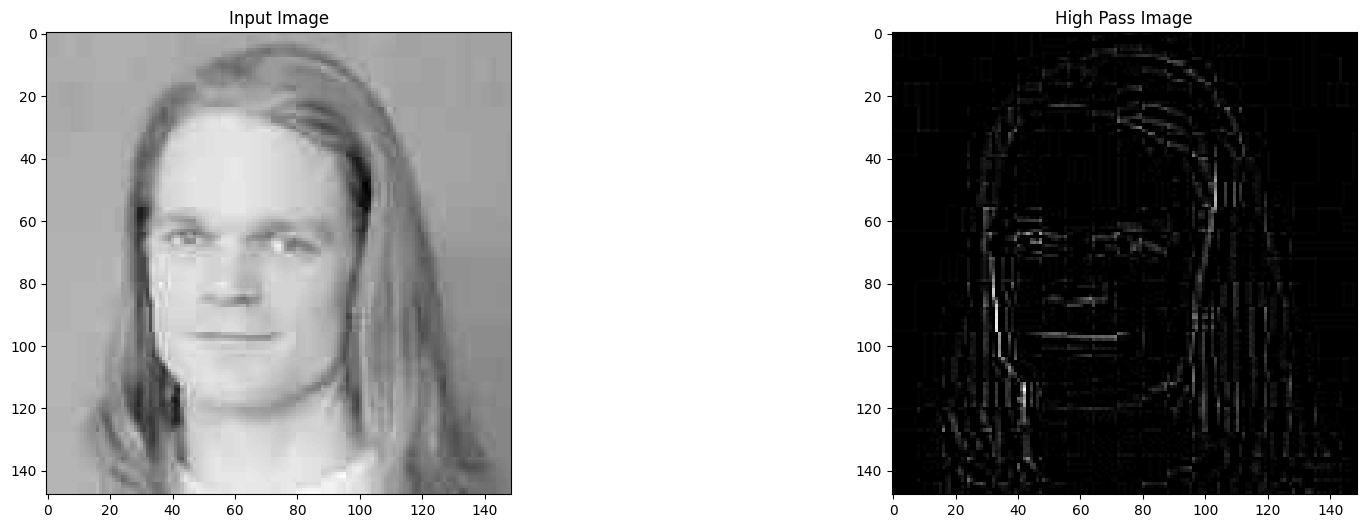

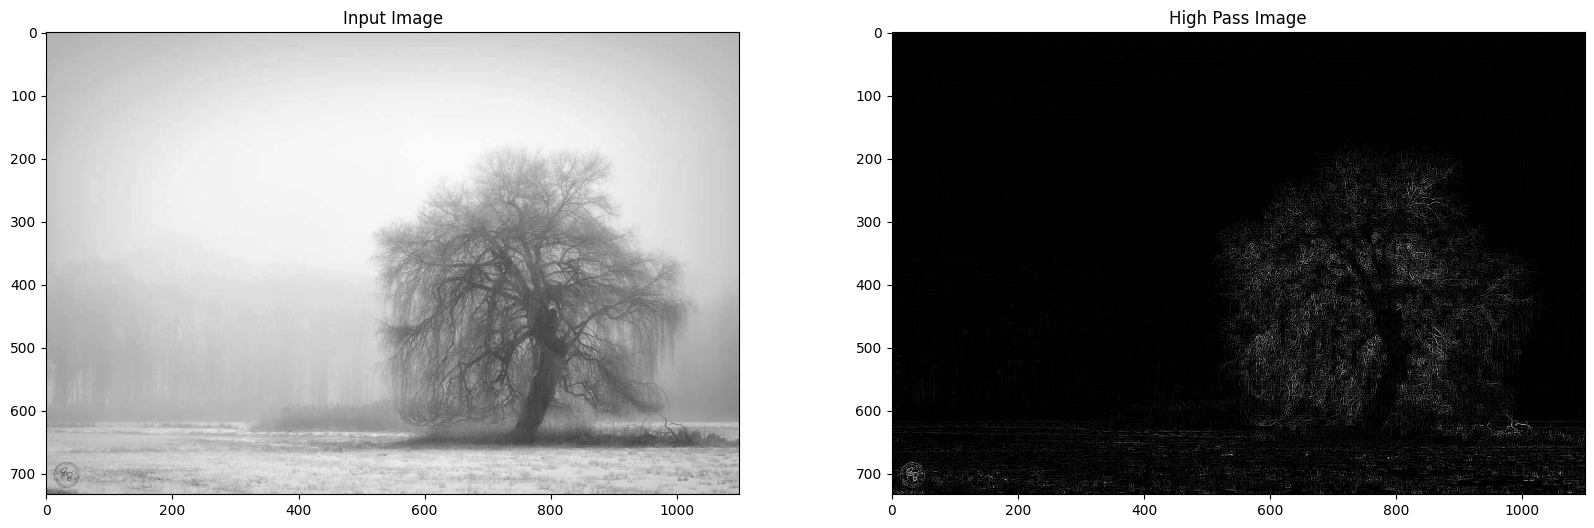

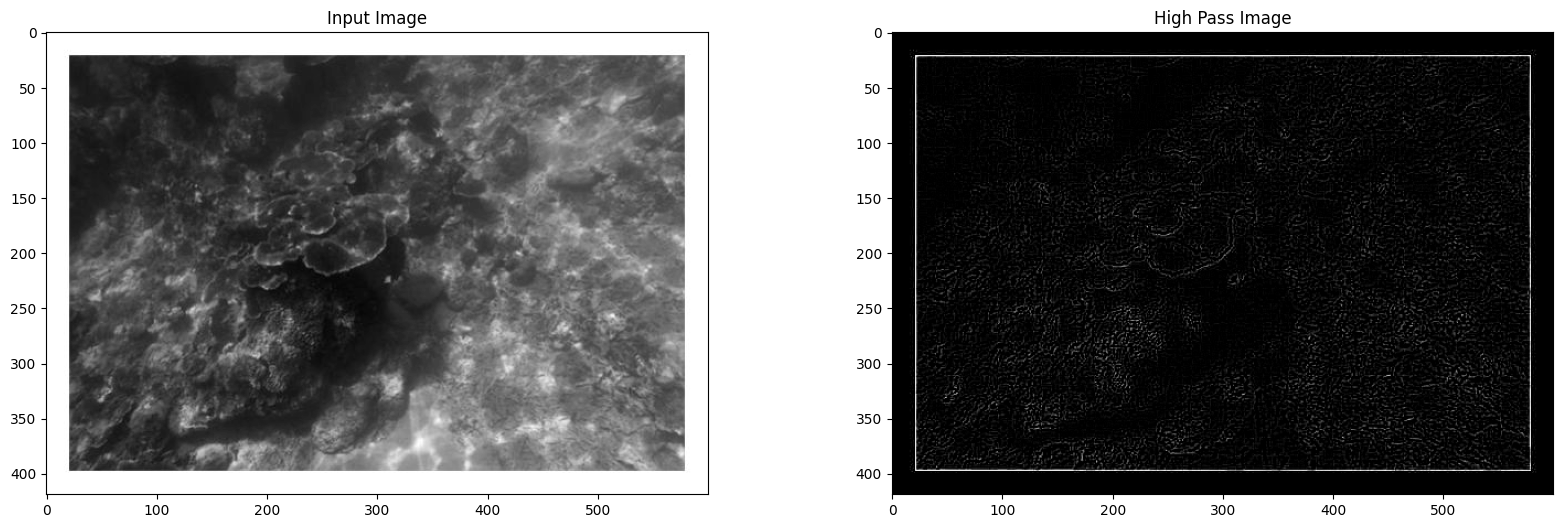

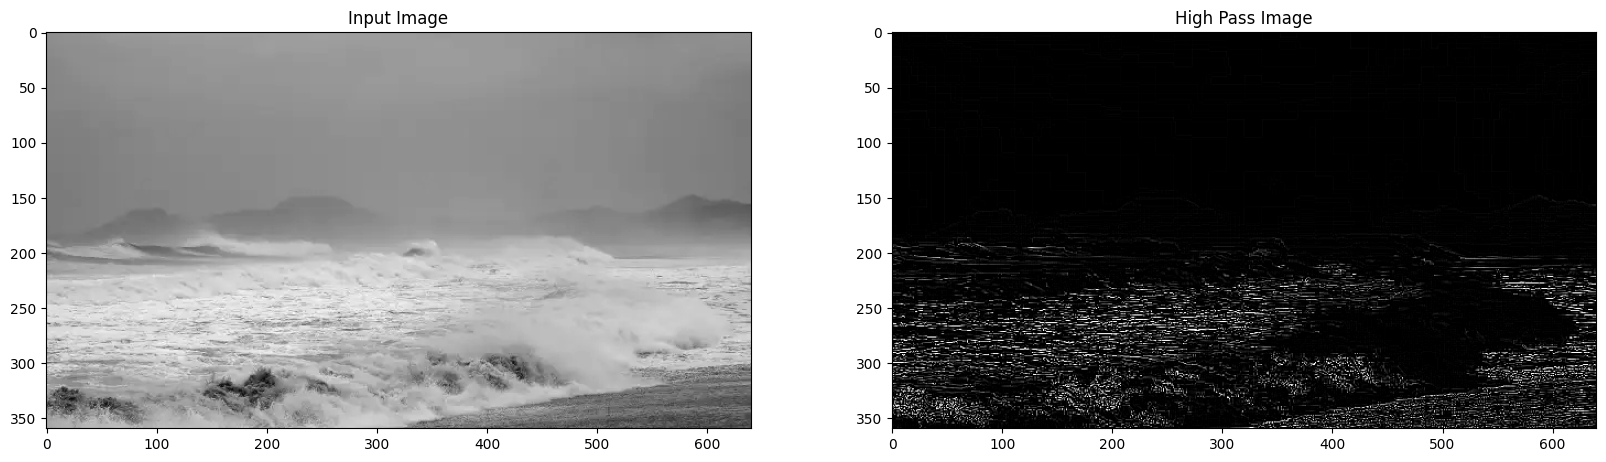

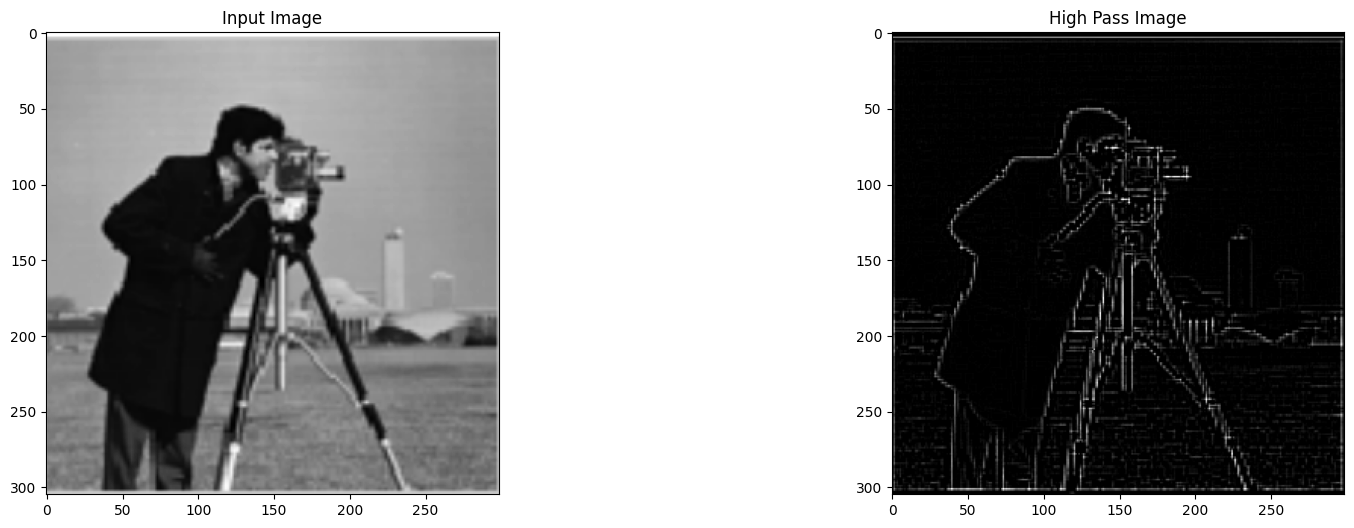

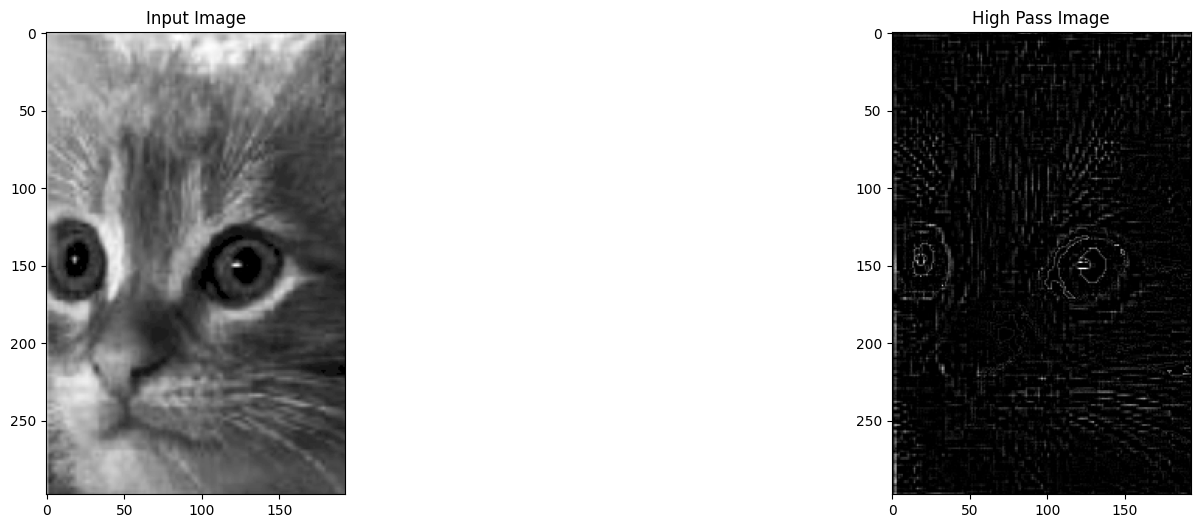

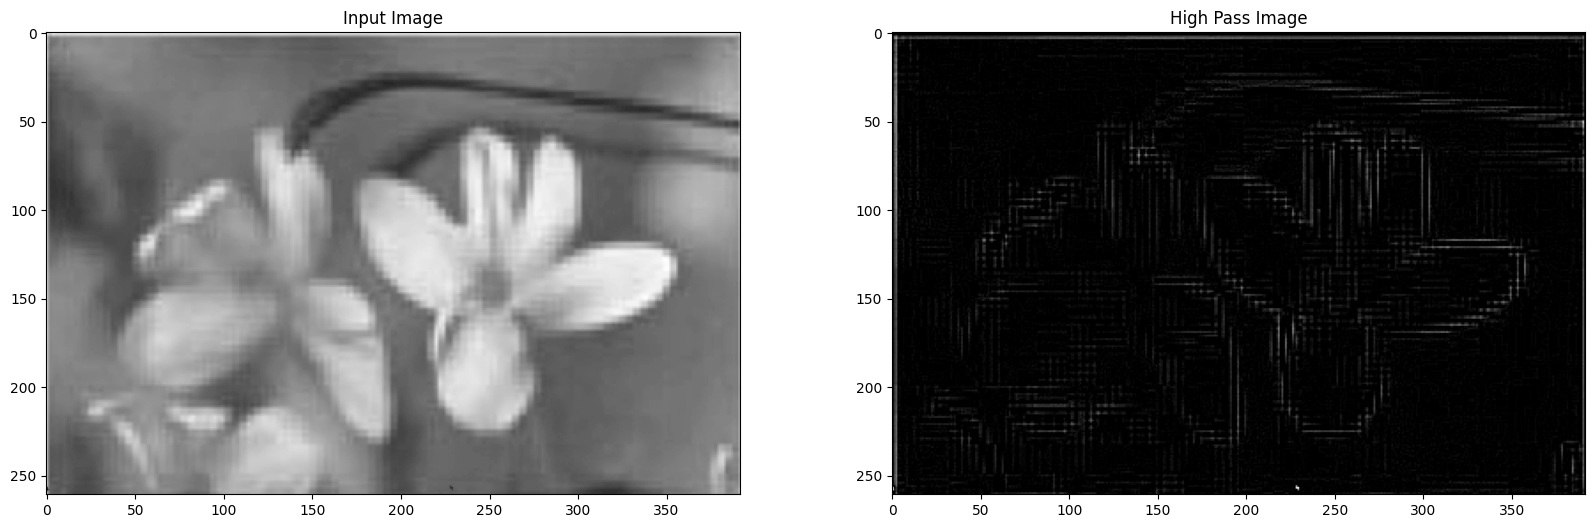

In [19]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def high_pass_filter(input_image):
    # Step 3: Construct High Pass Mask
    high_pass_mask = np.array([[1, 1, 1],
                                [1, -8, 1],
                                [1, 1, 1]])

    # Step 4: Construct High Pass Image
    high_pass_image = cv2.filter2D(input_image, -1, high_pass_mask)

    return high_pass_image

if __name__ == '__main__':
    # Assuming these variables are defined elsewhere in your code


    for path in paths:
        input_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        # Apply adaptive high boost filtering
        high_pass_image = high_pass_filter(input_image)

        # Plot input image and high-pass image
        plt.figure(figsize=(20, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(input_image, cmap='gray')
        plt.title('Input Image')

        plt.subplot(1, 2, 2)
        plt.imshow(high_pass_image, cmap='gray')
        plt.title('High Pass Image')
        plt.show()

        print()

# Adaptive High Boost Filter

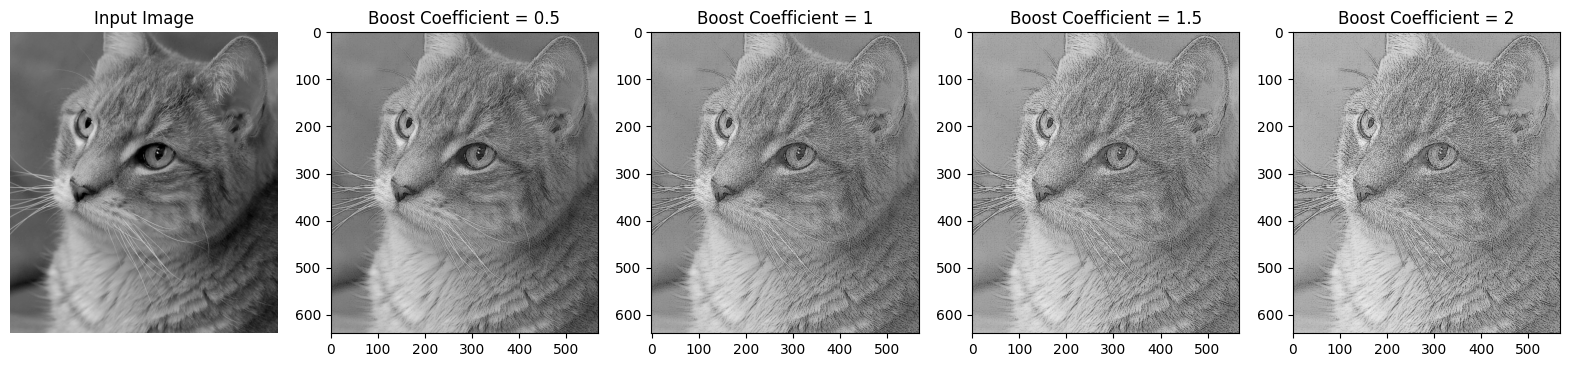

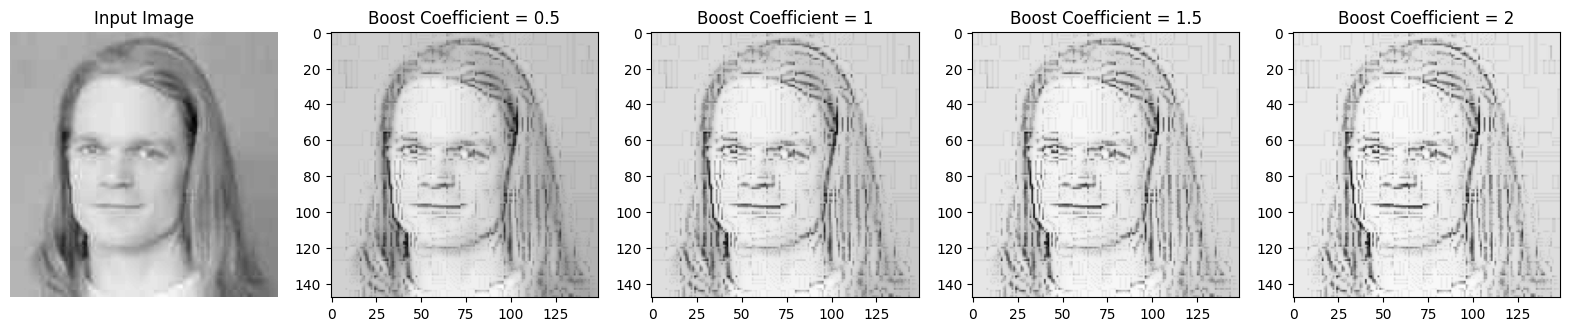

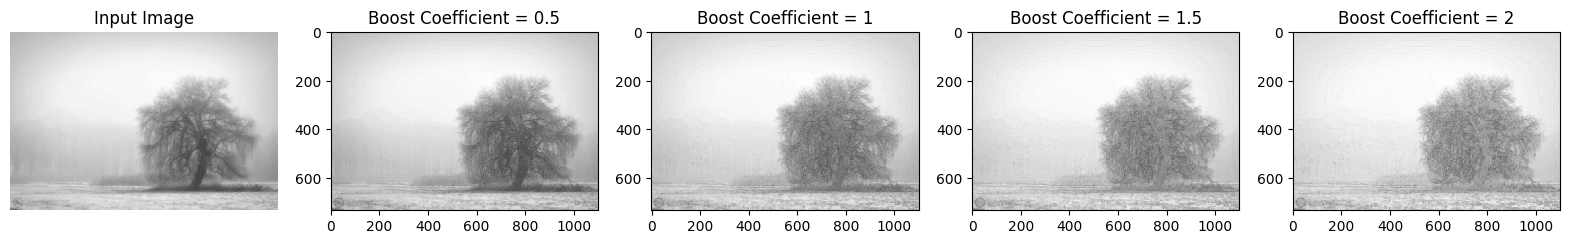

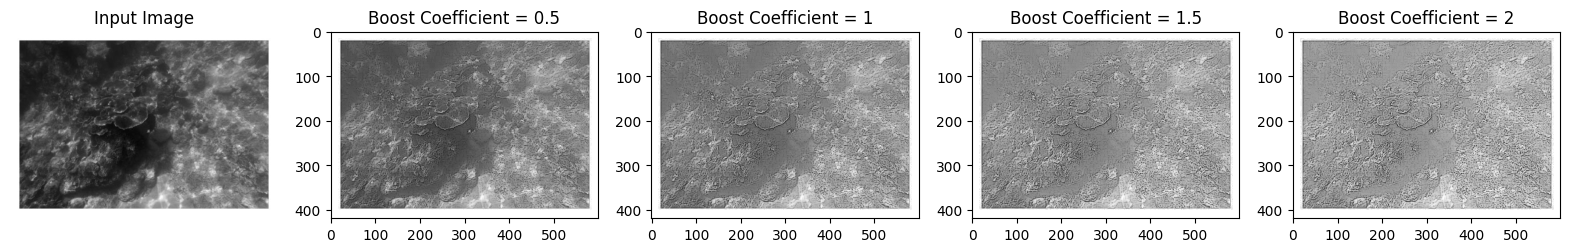

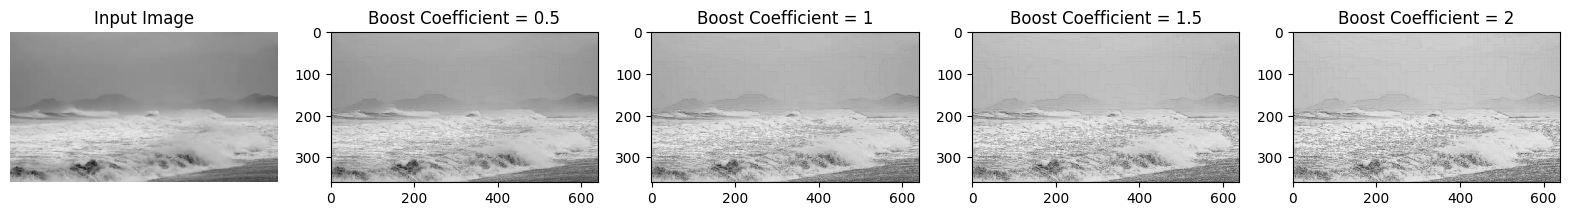

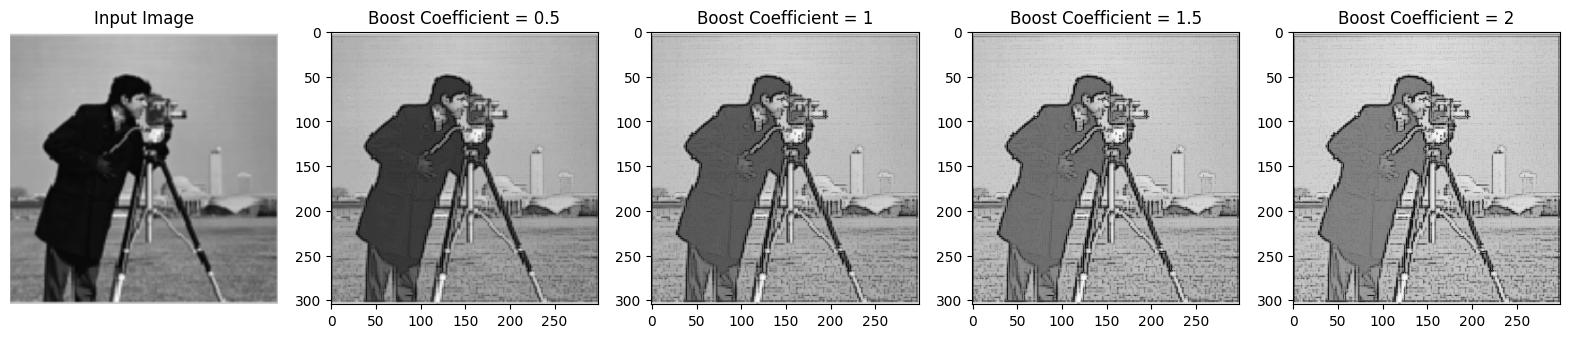

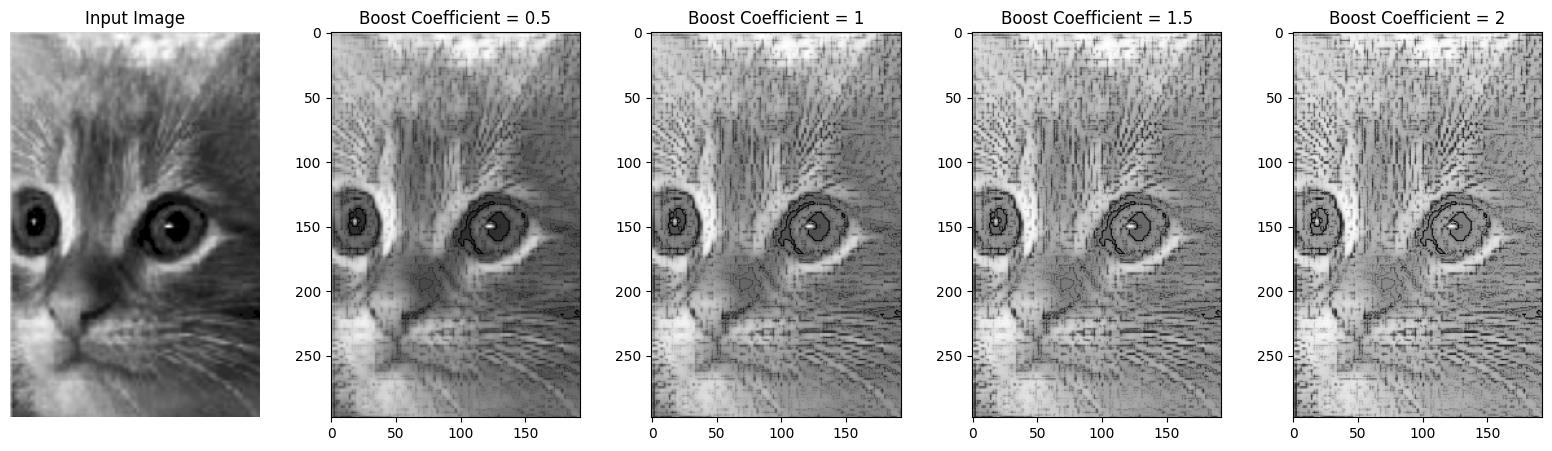

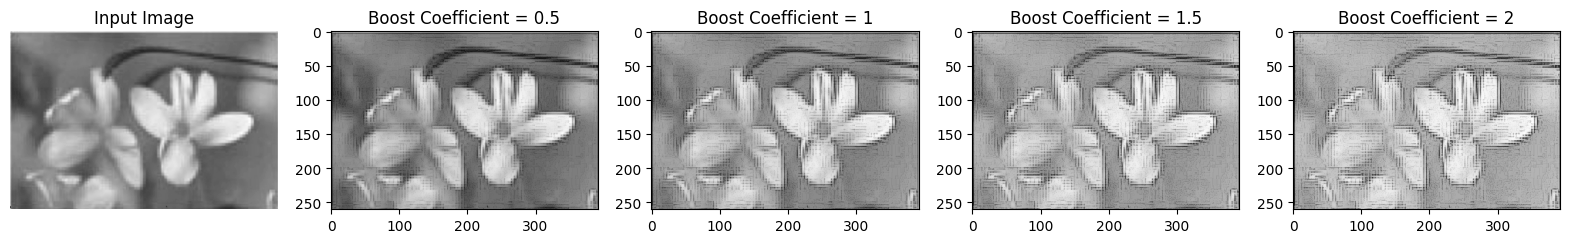

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def adaptive_high_boost_filter(input_image, boost_coefficient, range_coefficient):
    # Step 3: Construct High Pass Mask
    high_pass_mask = np.array([[1, 1, 1],
                               [1, -8, 1],
                               [1, 1, 1]])

    # Step 4: Construct High Pass Image
    high_pass_image = cv2.filter2D(input_image, -1, high_pass_mask)

    # Step 5: Adaptive Weight Design
    adaptive_weights = 1 - np.exp(-np.abs(high_pass_image) / (2 * range_coefficient ** 2))

    # Step 6: Construct High Boost Image
    high_boost_image = input_image + boost_coefficient * (adaptive_weights * high_pass_image)

    return high_boost_image

if __name__ == '__main__':
    boost_coefficients = [0.5, 1, 1.5, 2]
    range_coefficient = 10

    for path in paths:
        input_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        plt.figure(figsize=(20, 5))

        # Display input image
        plt.subplot(1, len(boost_coefficients) + 1, 1)
        plt.imshow(input_image, cmap='gray')
        plt.title('Input Image')
        plt.axis('off')

        # Display output images with different boost coefficients
        for i, boost_coefficient in enumerate(boost_coefficients, 2):
            output_image = adaptive_high_boost_filter(input_image, boost_coefficient, range_coefficient)

            plt.subplot(1, len(boost_coefficients) + 1, i)
            plt.imshow(output_image, cmap='gray')
            plt.title(f'Boost Coefficient = {boost_coefficient}')
